In [75]:
import numpy as np
import tensorflow as tf
import cv2
from google.cloud import storage
import io
from PIL import Image

import sys, os, inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(2,parentdir) 
from model.image_utils import *

In [76]:
client = storage.Client()

In [77]:
bucket = client.get_bucket('inpainting-final-project')

In [78]:
blobs = bucket.list_blobs(prefix= 'images/SVHN')

In [79]:
s = []
for blob in blobs:
    blob = bucket.get_blob(blob.name)
    print(blob)
    s.append(blob.download_as_string())

<Blob: inpainting-final-project, images/SVHN/test_32x32.mat>
<Blob: inpainting-final-project, images/SVHN/train_32x32.mat>


In [ ]:
type(s)

In [ ]:
def load_images_from_bucket(bucket='inpainting-final-project', path='images/Cars/cars_train/'):
    """
    Loading the images from the Google Cloud bucket
    """
    # Open bucket
    client = storage.Client()
    bucket = client.get_bucket('inpainting-final-project')
    blobs = bucket.list_blobs(prefix='images/Cars/cars_train/')
    images = [] 
    # Append images
    try:
        for blob in blobs:
            blob = bucket.get_blob(blob.name)
            s = blob.download_as_string()
            img = Image.open(io.BytesIO(s))
            
            #resize the image to (64,64,3) and normalize it to between -1 and 1
            resized_img = cv2.resize(np.asarray(img),(64,64))/127.5-1.0
            
            if resized_img.shape == (64,64,3):
                images.append(resized_img)
    except:
        pass
    return np.asarray(images)

In [ ]:
svhn_testx = svhn_test['X'] # test images
svhn_testy = svhn_test['y'] # test labels
svhn_trainx = svhn_train['X'] # train images
svhn_trainy = svhn_train['y'] # train labels

In [13]:
sys.path.append('../model')
import image_utils

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


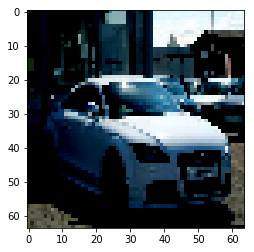

In [17]:
plt.imshow(svhn_test[0])
plt.show()